# Introduction to Statistics in Python

> Statistics is the study of how to collect, analyze, and draw conclusions from data. It’s a hugely valuable tool that you can use to bring the future into focus and infer the answer to tons of questions. Updating ...

- toc: true
- branch: master
- badges: true
- comments: true
- author: Datacamp
- categories: [Python, Data Visualization, EDA, Time Series, Machine Learning, scikit-learn, Regression, classification, Tempogram, Spectrogram, Cross-valiation, Stationarity]
- image: images/stats_intro.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2


> Statistics is the study of how to collect, analyze, and draw conclusions from data. It’s a hugely valuable tool that you can use to bring the future into focus and infer the answer to tons of questions. For example, what is the likelihood of someone purchasing your product, how many calls will your support team receive, and how many jeans sizes should you manufacture to fit 95% of the population? In this course, you'll discover how to answer questions like these as you grow your statistical skills and learn how to calculate averages, use scatterplots to show the relationship between numeric values, and calculate correlation. You'll also tackle probability, the backbone of statistical reasoning, and learn how to use Python to conduct a well-designed study to draw your own conclusions from data.

In [7]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

pd.set_option('display.expand_frame_repr', False)

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Summary Statistics

> Summary statistics gives you the tools you need to boil down massive datasets to reveal the highlights. In this chapter, you'll explore summary statistics including mean, median, and standard deviation, and learn how to accurately interpret them. You'll also develop your critical thinking skills, allowing you to choose the best summary statistics for your data.

### What is statistics?

> **Descriptive and inferential statistics**

Statistics can be used to answer lots of different types of questions, but being able to identify which type of statistics is needed is essential to drawing accurate conclusions. In this exercise, you'll sharpen your skills by identifying which type is needed to answer each question.

Identify which questions can be answered with descriptive statistics and which questions can be answered with inferential statistics.

![](./images/infer_desc.png)

> **Data type classification**

In the video, you learned about two main types of data: numeric and categorical. Numeric variables can be classified as either discrete or continuous, and categorical variables can be classified as either nominal or ordinal. These characteristics of a variable determine which ways of summarizing your data will work best.

Map each variable to its data type by dragging each item and dropping it into the correct data type.

![](./images/infer_desc2.png)

### Measures of center

> **Mean and median**

In this chapter, you'll be working with the 2018 Food Carbon Footprint Index from nu3. The food_consumption dataset contains information about the kilograms of food consumed per person per year in each country in each food category (consumption) as well as information about the carbon footprint of that food category (co2_emissions) measured in kilograms of carbon dioxide, or CO2, per person per year in each country.

In this exercise, you'll compute measures of center to compare food consumption in the US and Belgium using your pandas and numpy skills.

pandas is imported as pd for you and food_consumption is pre-loaded.

Instruction: <br>

- Import numpy with the alias np.
- Create two DataFrames: one that holds the rows of food_consumption for 'Belgium' and another that holds rows for 'USA'. Call these be_consumption and usa_consumption.
- Calculate the mean and median of kilograms of food consumed per person per year for both countries.


In [3]:
food_consumption = pd.read_csv('./datasets/food_consumption.csv', index_col=0)
display(food_consumption.head())

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


In [4]:
# Import numpy with alias np
import numpy as np

# Filter for Belgium
be_consumption =food_consumption[food_consumption['country'] == 'Belgium'] 

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA'] 

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate m)an and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


- Subset food_consumption for rows with data about Belgium and the USA.
- Group the subsetted data by country and select only the consumption column.
- Calculate the mean and median of the kilograms of food consumed per person per year in each country using .agg().

In [5]:
# Import numpy as np
import numpy as np

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


When you want to compare summary statistics between groups, it's much easier to use .groupby() and .agg() instead of subsetting and calling the same functions multiple times.

> **Mean vs. median**

In the video, you learned that the mean is the sum of all the data points divided by the total number of data points, and the median is the middle value of the dataset where 50% of the data is less than the median, and 50% of the data is greater than the median. In this exercise, you'll compare these two measures of center.

pandas is loaded as pd, numpy is loaded as np, and food_consumption is available.

Instructions: <br>

- Import matplotlib.pyplot with the alias plt.
- Subset food_consumption to get the rows where food_category is 'rice'.
- Create a histogram of co2_emission for rice and show the plot.

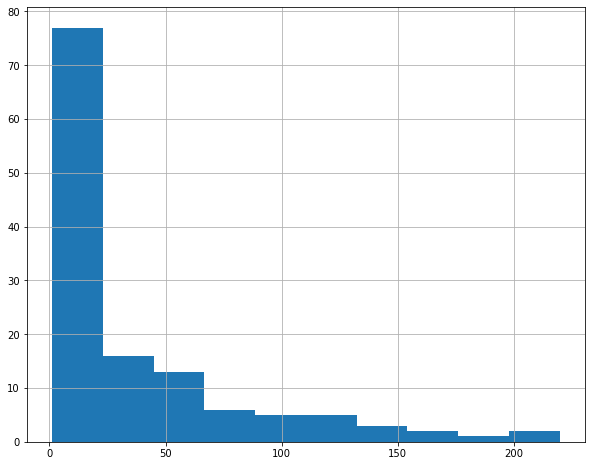

In [8]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
rice_consumption.co2_emission.hist()
plt.show()

- Use .agg() to calculate the mean and median of co2_emission for rice.

In [9]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption.agg([np.mean, np.median]))

        consumption  co2_emission
mean      29.375154     37.591615
median    11.875000     15.200000


Given the skew of this data, what measure of central tendency best summarizes the kilograms of CO2 emissions per person per year for rice?

> Answer: Median

### Measures of spread


> **Quartiles, quantiles, and quintiles**

Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.

In this exercise, you'll calculate quartiles, quintiles, and deciles, which split up a dataset into 4, 5, and 10 pieces, respectively.

In [25]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],np.linspace(0, 1, 5)))

[   0.        5.21     16.53     62.5975 1712.    ]


In [26]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],np.linspace(0, 1, 6)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [27]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'],np.linspace(0, 1, 10)))

[0.00000000e+00 9.05555556e-01 4.19111111e+00 8.05333333e+00
 1.32000000e+01 2.10944444e+01 3.58666667e+01 7.90622222e+01
 1.86115556e+02 1.71200000e+03]


Those are some high-quality quantiles! While calculating more quantiles gives you a more detailed look at the data, it also produces more numbers, making the summary more difficult to quickly understand.

> **Variance and standard deviation**

Variance and standard deviation are two of the most common ways to measure the spread of a variable, and you'll practice calculating these in this exercise. Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.

Both pandas as pd and numpy as np are loaded, and food_consumption is available.

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


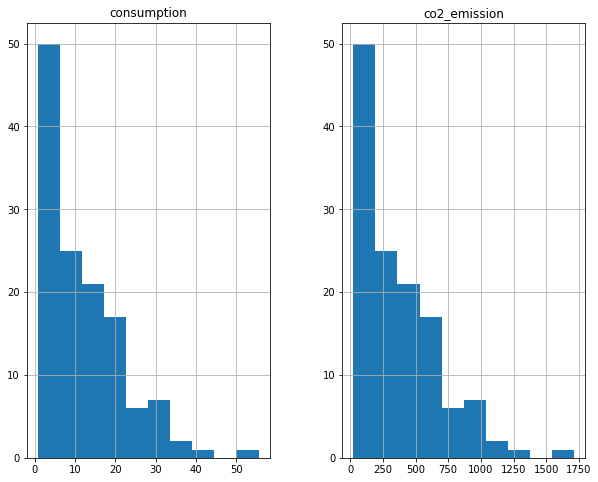

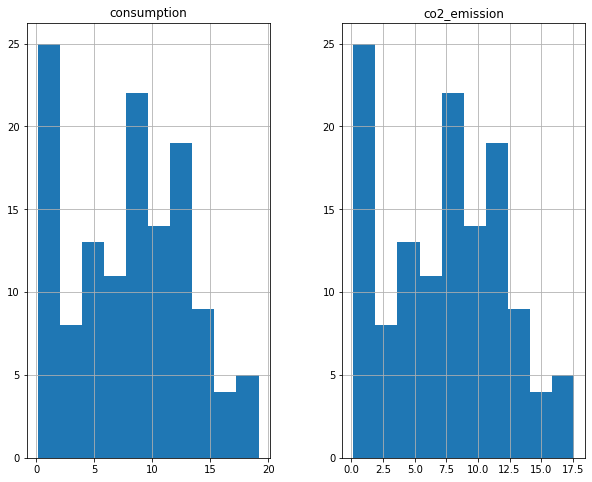

In [24]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category']=='beef'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category']=='eggs'].hist()
# Show plot
plt.show()

Beef has the largest amount of variation in its CO2 emissions, while eggs have a relatively small amount of variation.

> **Finding outliers using IQR**

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than $Q1−1.5×IQR$ or greater than $Q3+1.5×IQR$, it's considered an outlier. <br>

![iqr](images/iqr.png)

<br>

In this exercise, you'll calculate IQR and use it to find some outliers.

In [28]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [36]:
display(emissions_by_country.sort_values())

country
Mozambique      141.40
Rwanda          181.63
Togo            188.09
Liberia         203.38
Malawi          207.94
                ...   
Iceland        1731.36
New Zealand    1750.95
Albania        1777.85
Australia      1938.66
Argentina      2172.40
Name: co2_emission, Length: 130, dtype: float64

In [35]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country > upper) | (emissions_by_country < lower)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


Outstanding outlier detection! It looks like Argentina has a substantially higher amount of CO2 emissions per person than other countries in the world.

## Random Numbers and Probability

> In this chapter, you'll learn how to generate random samples and measure chance using probability. You'll work with real-world sales data to calculate the probability of a salesperson being successful. Finally, you’ll use the binomial distribution to model events with binary outcomes.

### What are the chances?

- Measuring chance

What's the probability of an event?
$$ P(\text{event}) = \frac{\text{\# ways event can happen}}{\text{total \# of possible outcomes}} $$

> **With or without replacement?**

For each scenario, decide whether it's sampling with replacement or sampling without replacement.

![](./images/with_without_replacement.png)

Correctly identifying the type of sampling that needs to be used is key to calculating accurate probabilities. With replacement, everyone always has a 5% chance of working on the weekend. Without replacement, the second pick has a 4/19 chance, and the third pick has a 3/18 chance of working on the weekend.

> **Calculating probabilities**

You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Recall that the probability of an event can be calculated by

$$ P(\text{event}) = \frac{\text{\# ways event can happen}}{\text{total \# of possible outcomes}} $$

In [37]:
amir_deals = pd.read_csv('./datasets/amir_deals.csv', index_col=0)
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [40]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


In [41]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / len(amir_deals['product'])
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C?

> Ans: 8.43%

> **Sampling deals**

In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

Instructions: <br>

- Set the random seed to 24.
- Take a sample of 5 deals without replacement and store them as sample_without_replacement.

In [38]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5, replace=False)
print(sample_without_replacement)

       product   client status   amount  num_users
128  Product B  Current    Won  2070.25          7
149  Product D  Current    Won  3485.48         52
78   Product B  Current    Won  6252.30         27
105  Product D  Current    Won  4110.98         39
167  Product C      New   Lost  3779.86         11


- Take a sample of 5 deals with replacement and save as sample_with_replacement.

In [39]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

       product   client status   amount  num_users
163  Product D  Current    Won  6755.66         59
132  Product B  Current    Won  6872.29         25
88   Product C  Current    Won  3579.63          3
146  Product A  Current    Won  4682.94         63
146  Product A  Current    Won  4682.94         63


What type of sampling is better to use for this situation?

> Answers: Without replacement

It's important to consider how you'll take a sample since there's no one-size-fits-all way to sample, and this can have an effect on your results.

### Discrete distributions


> **Creating a probability distribution**

A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the restaurant_groups DataFrame.

Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum. The restaurant_groups data is available. pandas is loaded as pd, numpy is loaded as np, and matplotlib.pyplot is loaded as plt.

Instructions: <br>

- Create a histogram of the group_size column of restaurant_groups, setting bins to [2, 3, 4, 5, 6]. Remember to show the plot.

In [43]:
restaurant_groups = pd.read_csv('./datasets/restaurant_groups.csv')
restaurant_groups.head()

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2


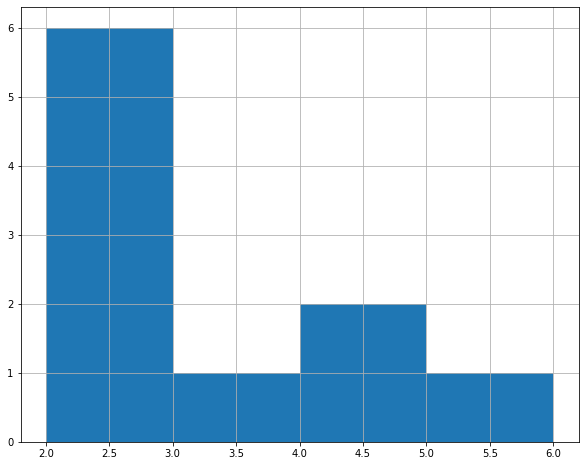

In [44]:
restaurant_groups['group_size'].hist(bins=[2, 3, 4, 5, 6])
plt.show()

- Count the number of each group_size in restaurant_groups, then divide by the number of rows in restaurant_groups to calculate the probability of randomly selecting a group of each size. Save as size_dist.
- Reset the index of size_dist.
- Rename the columns of size_dist to group_size and prob.


In [45]:
size_dist = restaurant_groups['group_size'] / restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

   group_size  prob
0           0   0.2
1           1   0.4
2           2   0.6
3           3   0.2
4           4   0.2
5           5   0.2
6           6   0.3
7           7   0.2
8           8   0.4
9           9   0.2


- Calculate the expected value of the size_distribution, which represents the expected group size, by multiplying the group_size by the prob and taking the sum.


In [46]:
# Calculate expected value
expected_value = (size_dist['group_size'] * size_dist['prob']).sum()
print(expected_value)

12.200000000000001



- Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.

In [47]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()
print(prob_4_or_more)

0.30000000000000004


> **Identifying distributions**


> **Expected value vs. sample mean**


### Continuous distributions


> **Which distribution?**


> **Data back-ups**


> **Simulating wait times**



### The binomial distribution


> **Simulating sales deals**


> **Calculating binomial probabilities**


> **How many sales will be won?**

## More Distributions and the Central Limit Theorem

> It’s time to explore one of the most important probability distributions in statistics, normal distribution. You’ll create histograms to plot normal distributions and gain an understanding of the central limit theorem, before expanding your knowledge of statistical functions by adding the Poisson, exponential, and t-distributions to your repertoire.

### The normal distribution
> **Distribution of Amir's sales**
> **Probabilities from the normal distribution**
> **Simulating sales under new market conditions**
> **Which market is better?**

### The central limit theorem
> **Visualizing sampling distributions**
> **The CLT in action**
> **The mean of means**

### The Poisson distribution
> **Identifying lambda**
> **Tracking lead responses**

### More probability distributions
> **Distribution dragging and dropping**
> **Modeling time between leads**
> **The t-distribution**

## Correlation and Experimental Design

> In this chapter, you'll learn how to quantify the strength of a linear relationship between two variables, and explore how confounding variables can affect the relationship between two other variables. You'll also see how a study’s design can influence its results, change how the data should be analyzed, and potentially affect the reliability of your conclusions.

### Correlation
> **Guess the correlation**
> **Relationships between variables**

### Correlation caveats
> **What can't correlation measure?**
> **Transforming variables**
> **Does sugar improve happiness?**
> **Confounders**

### Design of experiments
> **Study types**
> **Longitudinal vs. cross-sectional studies**

### Congratulations!